# CSCI 270 - Computational Humanities - Spring 2020 
# Lab 4 - Document Clustering

In [1]:
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import re

# Setup - Load data from files

Here we load the data into a list of strings. These strings have only lowercase words and whitespace. Also, we keep a separate list of the titles of each document.

In [2]:
documents = [
"wet snow falls in winter snow falls",
"cold and wet in winter",
"cold wet snow packs best best",
"cold snow is cold and wet"]

filenames = ["A", "B", "C", "D"]

In [3]:
######
# Uncomment this section for loading in the documents, replacing 
# WheelOfTime with Poems or Books
######

#filedir = "Corpus2020/Books"
#documents = []
#filenames = []
#for f in os.listdir(filedir):
#    if f.endswith(".txt"):
#        filenames.append(f[:-4].replace("_", " "))
#        fopen = open(filedir + "/" + f)
#        documents.append(re.sub(r'[^\w\s]', '', fopen.read().lower().replace("\n", " ")))

# Part 1 - Finding tf-idf matrix

Write a function to find the term frequencies for all documents. It should return a dictionary, where the key is the name of the file, and the value is a dictionary of term frequency counts.

In [4]:
def term_freqs(text, names):

    ## WRITE ME ##

In [5]:
tf = term_freqs(documents, filenames)
tf

{'A': {'falls': 2, 'in': 1, 'snow': 2, 'wet': 1, 'winter': 1},
 'B': {'and': 1, 'cold': 1, 'in': 1, 'wet': 1, 'winter': 1},
 'C': {'best': 2, 'cold': 1, 'packs': 1, 'snow': 1, 'wet': 1},
 'D': {'and': 1, 'cold': 2, 'is': 1, 'snow': 1, 'wet': 1}}

Write a function to return a list of all words in the corpus without duplicates. To facilitate fast lookup when checking for uniqueness, use the $set()$ class.

In [6]:
def all_terms(text):

    ## WRITE ME ##

In [7]:
terms = all_terms(documents)
terms

['packs', 'wet', 'and', 'snow', 'winter', 'falls', 'in', 'best', 'cold', 'is']

Write a function to return a dictionary where the keys are the words in the corpus and the values are the inverse document frequency for that term. Again, to make this efficient, make use of the $set()$ class.

$$idf(t, D) = log\frac{N}{|\{d \in D : t \in d\}|}$$

In [8]:
def inv_doc_freqs(text, terms):

    ## WRITE ME ##

In [9]:
idf = inv_doc_freqs(documents, terms)
idf

{'and': 0.6931471805599453,
 'best': 1.3862943611198906,
 'cold': 0.28768207245178085,
 'falls': 1.3862943611198906,
 'in': 0.6931471805599453,
 'is': 1.3862943611198906,
 'packs': 1.3862943611198906,
 'snow': 0.28768207245178085,
 'wet': 0.0,
 'winter': 0.6931471805599453}

Write a function that returns a 2D matrix, with a column for each word in the corpus, and a row for each document in the corpus. The values for a row and column will be the tf-idf score for that word in that document.

In [10]:
def find_tfidf(tf, idf, terms):

    ## WRITE ME ##

In [11]:
tfidf = find_tfidf(tf, idf, terms)

The function below will print our small Snow matrix in a readable format. 

**Note:** This function will be useless on the larger datasets with many unique words, and should be commented out.

In [12]:
def pretty_matrix(col_head, row_head, matrix):
    top = "   "
    for t in col_head:
        top += '{:7s}'.format(t)
    print(top)
    for i in range(len(matrix)):
        d = matrix[i]
        s = row_head[i] + ": "
        for f in d:
            s += f'{f:5.3f}' + "  "
        print(s)
        
pretty_matrix(terms, filenames, tfidf)

     snow   is     wet    best   packs  and    winter falls  in     cold
A: 0.575  0.000  0.000  0.000  0.000  0.000  0.693  2.773  0.693  0.000
B: 0.000  0.000  0.000  0.000  0.000  0.693  0.693  0.000  0.693  0.288
C: 0.288  0.000  0.000  2.773  1.386  0.000  0.000  0.000  0.000  0.288
D: 0.288  1.386  0.000  0.000  0.000  0.693  0.000  0.000  0.000  0.575


# Part 2 - Distance Matrix and Cosine Similarity

Write a function to calculate the dot product of two vectors $\bf{a}$ and $\bf{b}$.

$$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_ib_i$$

In [13]:
def dot_product(a, b):

    ## WRITE ME ##

In [14]:
print(dot_product([1, 2, 3], [4, 8, 12]))
print(dot_product([1, 2, 3], [4, 5, 6]))
print(dot_product([1, 2, 3], [1, 1, 1]))
print(dot_product([1, 2, 3], [3, 2, 1]))
print(dot_product([3, 0, 3], [0, 3, 0]))

56
32
6
10
0


Write a function to calculate the cosine similarity of two vectors $\bf{a}$ and $\bf{b}$.

$$cos(\theta) = \frac{\mathbf{a} \cdot \mathbf{b}}{||\mathbf{a}||~||\mathbf{b}||}$$

where 

$$||\mathbf{a}|| = \sqrt{\mathbf{a} \cdot \mathbf{a}}$$

In [15]:
def cosine_sim(a, b):

    ## WRITE ME ##

In [16]:
print(cosine_sim([1, 2, 3], [4, 8, 12]))
print(cosine_sim([1, 2, 3], [4, 5, 6]))
print(cosine_sim([1, 2, 3], [1, 1, 1]))
print(cosine_sim([1, 2, 3], [3, 2, 1]))
print(cosine_sim([3, 0, 3], [0, 3, 0]))

1.0
0.9746318461970762
0.9258200997725515
0.7142857142857143
0.0


Write a function to calculate the distance matrix between all row vectors in our tf-idf matrix. The distance should be $1-cosine\_sim$.

In [17]:
def dist_matrix(vecs):

    ## WRITE ME ##

In [18]:
dmat = dist_matrix(tfidf)
pretty_matrix(filenames, filenames, dmat)

   A      B      C      D      
A: 0.000  0.740  0.982  0.967  
B: 0.740  0.000  0.979  0.688  
C: 0.982  0.979  0.000  0.953  
D: 0.967  0.688  0.953  -0.000  


# Part 3 - Clustering with UPGMA

Write a function to calculate the nearest pair of documents when given a matrix of distances between them. The function should return a tuple listing the index of the first document, the index of the second document, and their distance.

In [19]:
def nearest(matrix):

    ## WRITE ME ##

In [20]:
nearest(dmat)

(1, 3, 0.6881940602419325)

Clusters are defined by a list with 4 values:

* index of first child
* index of second child
* distance between children
* number of documents in the cluster

This is a function to create the list of initial clusters for the leaves in our tree. We have one cluster for each of our original documents.

In [21]:
def init_clusters(matrix):
    clusters = []
    for i in range(len(matrix)):
        clusters.append([i, i, 0, 1])
    return clusters

In [22]:
c = init_clusters(dmat)
c

[[0, 0, 0, 1], [1, 1, 0, 1], [2, 2, 0, 1], [3, 3, 0, 1]]

Write a function to calculate the unweighted distance of a new cluster formed from $A$ and $B$ to another cluster $X$, when given the size of the clusters $A$ and $B$ and their distances to $X$. This will be used in the UPGMA algorithm below.

$$d_{(A \cup B),X} = \frac{|A|~d_{A,X}~+~|B|~d_{B,X}}{|A|~+~|B|}$$

In [23]:
def new_dist(a_size, b_size, d_a_x, d_b_x):

    ## WRITE ME ##

In [24]:
print(new_dist(1, 1, 0.740, 0.967))
print(new_dist(2, 1, 0.740, 0.967))

0.8534999999999999
0.8156666666666667


Finally, write a function that brings in a distance matrix and creates clusters using the UPGMA algorithm. This algorithm  iteratively combines the two closest clusters until there is one single tree. Here is the pseudocode for this algorithm:

* Create the initial list of leaf clusters
* While we still have multiple independent clusters
  * Find the nearest two clusters according to our distance matrix
  * Join these two clusters to make a new cluster
  * Add new distances to our matrix for every row and column between it and the new cluster
* Return the list of created clusters, minus the initial leaves

In [25]:
def upgma(m):

    ## WRITE ME ##

In [26]:
c = upgma(dmat[:])
c

[[1, 3, 0.6881940602419325, 2],
 [0, 4, 0.8536675922317023, 3],
 [2, 5, 0.9711888322946779, 4]]

# Part 4 - Dendrogram

Finally, we can use the $dendrogram$ function in the $scipy.hierarchy$ module to draw the resulting tree from our clustered data.

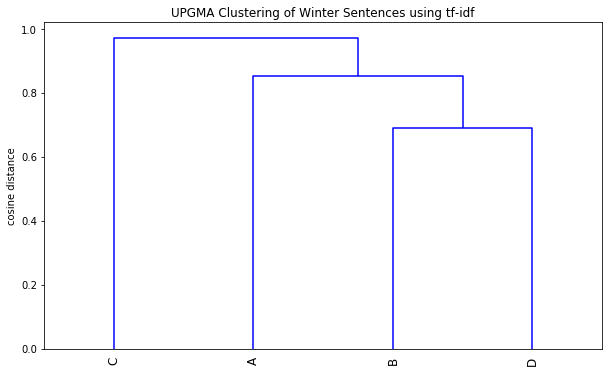

In [27]:
plt.figure()
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(c, labels = filenames, leaf_rotation=90 )
plt.title("UPGMA Clustering of Winter Sentences using tf-idf")
plt.ylabel("cosine distance")
plt.show()

**Note:** The experiments and discussion in part 5 rely on a working UPGMA function. If you have completed part 2 to get the distance matrix dmat but are struggling with part 3, then you can use the following code to compute the clusters, it is equivalent to our UPGMA code.

    c = hierarchy.linkage(np.array(dmat), 'average')

You would not receive credit for step 3, but it will enable you to run the code in step 4 and complete the experiments in step 5.

# Part 5 - Experiments and Discussion

Draw a dendrogram and discuss the results of your clustering for each of the following four experiments
* Poems using tf only
* Poems using tf-idf
* Books using tf only
* Books using tf-idf

Find two new books to compare with your texts, one that you believe will match another in writing style, and one that will match in content. Repeat the above analysis, and explicitly denote the closest book from the corpus using the cosine similarity metric. Was your hypothesis correct?